In [20]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px #Interactive Plots
import plotly.graph_objs as pgo #Interactive Plots

df = pd.read_csv('data/lists of songs/dataframe_song_features.csv')
df = df.drop(df.columns[0], axis=1)

df.insert(2, 'year', df.title.str.extract('(\d+)'))
df.insert(2, 'country', df.title.str.split(': ').str[-1])
df = df.drop(columns = 'title', axis = 1)


C:\Users\herre\AppData\Local\Temp\ipykernel_2348\670316904.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



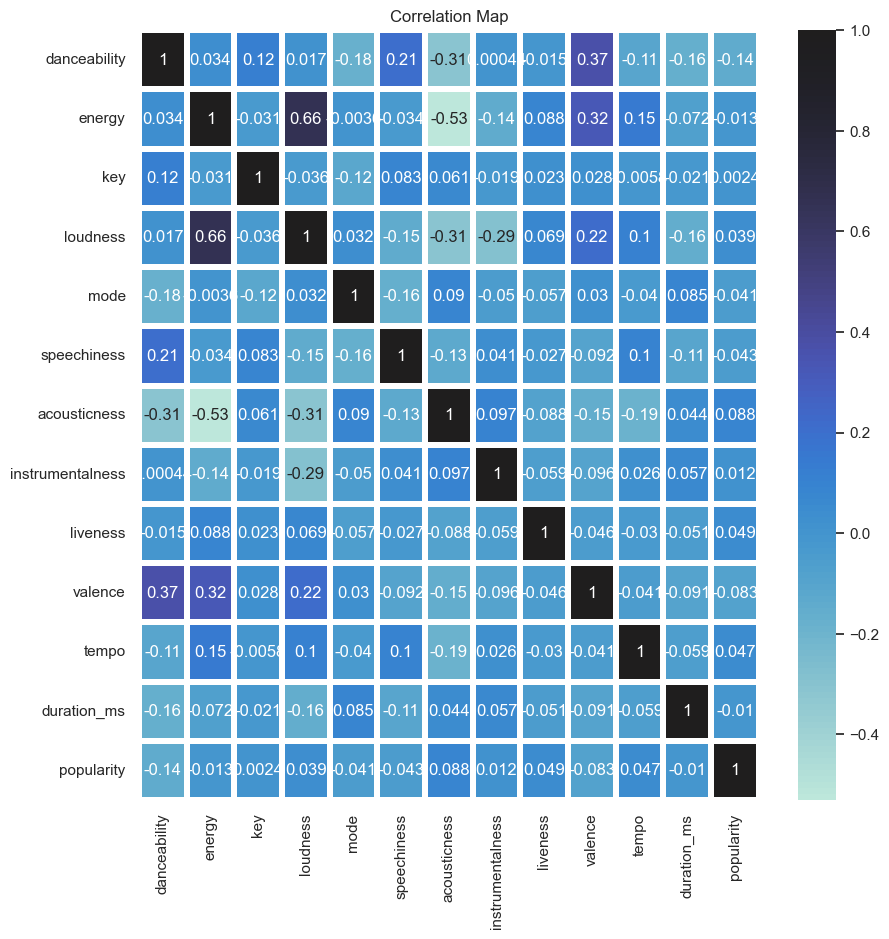

In [67]:
#Heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(df.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

plt.savefig('charts/corrmap.png')

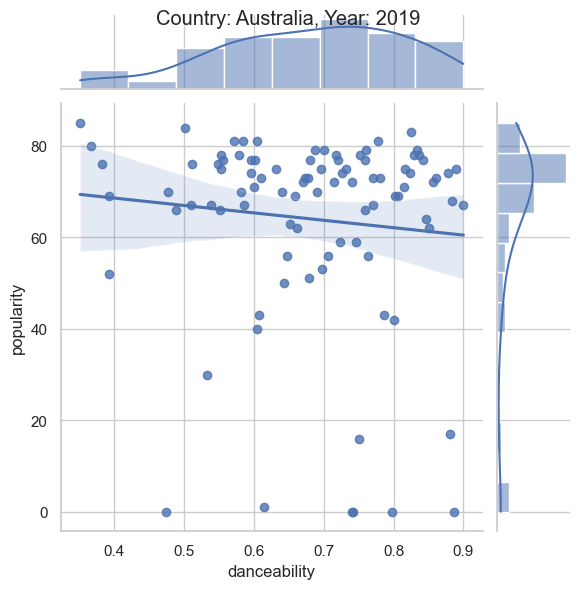

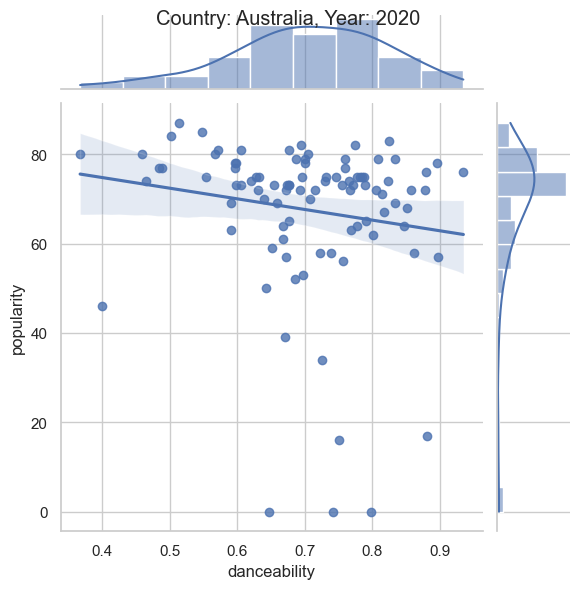

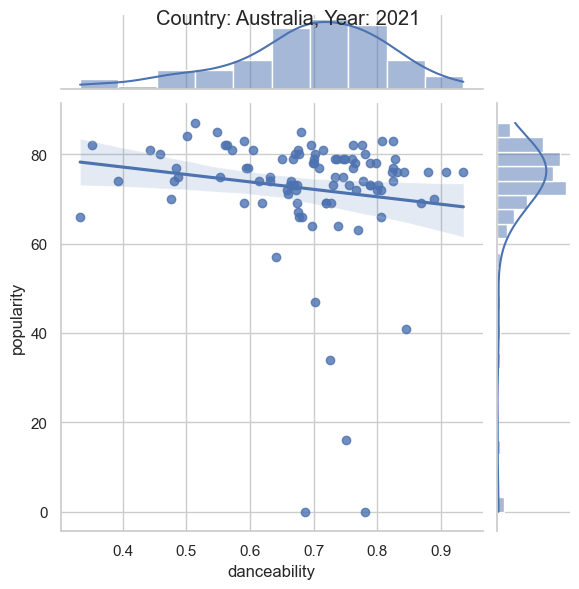

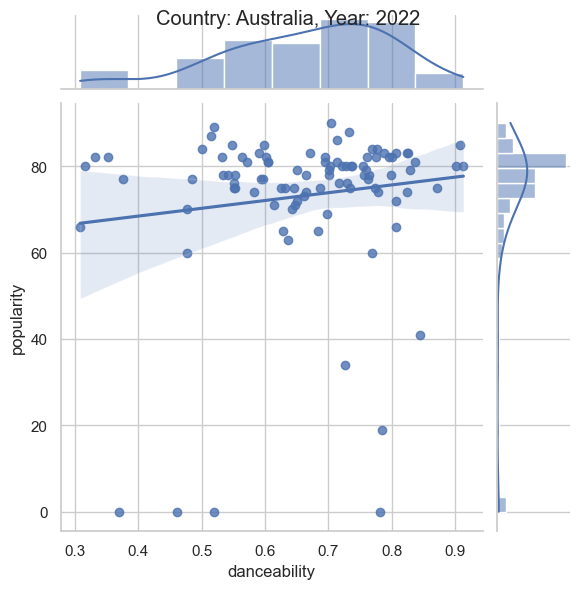

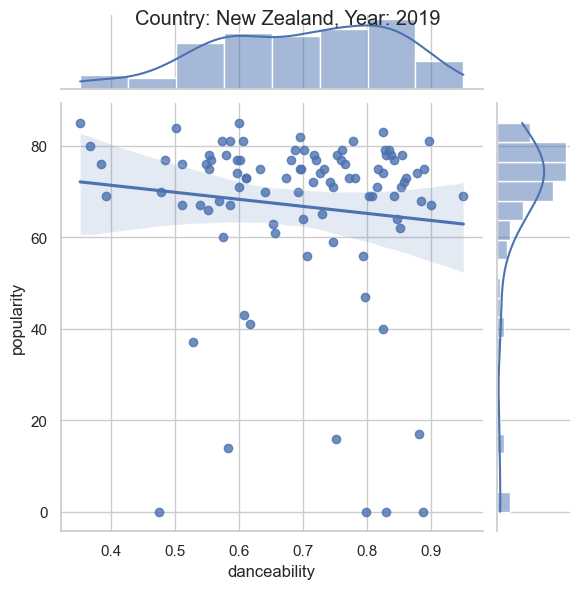

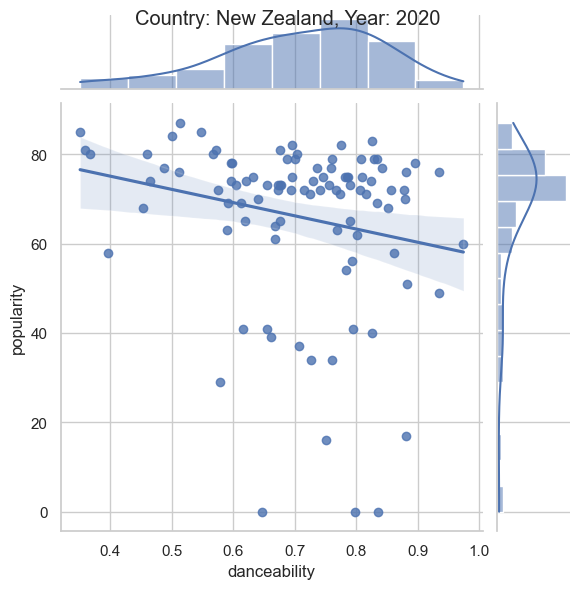

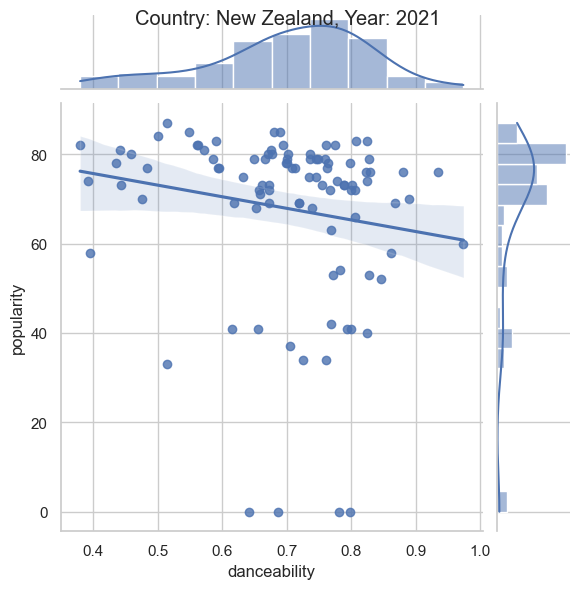

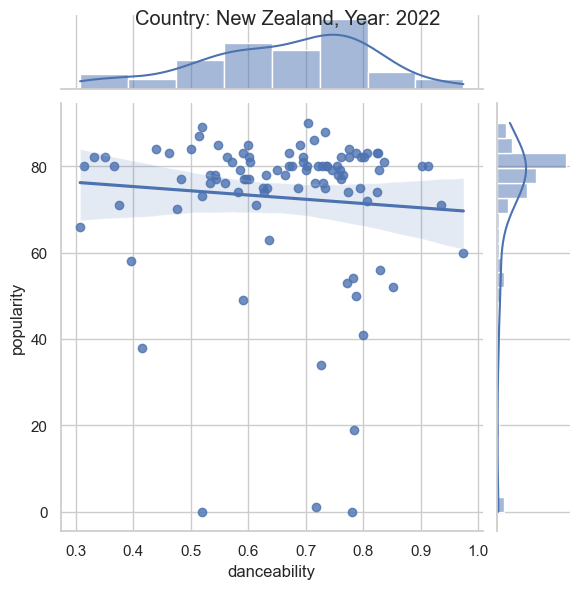

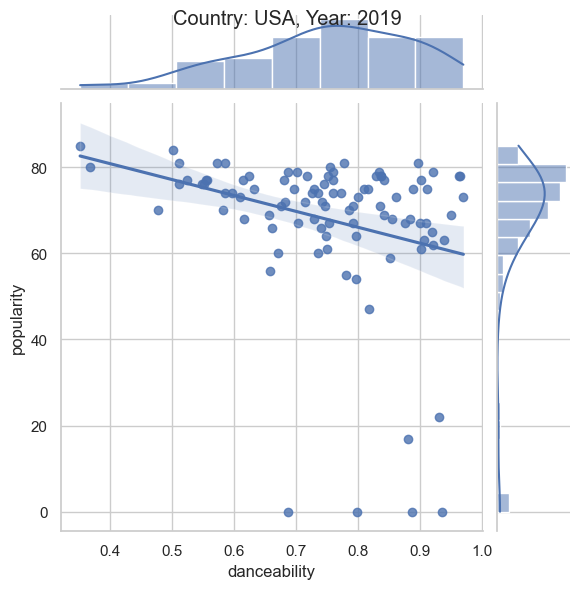

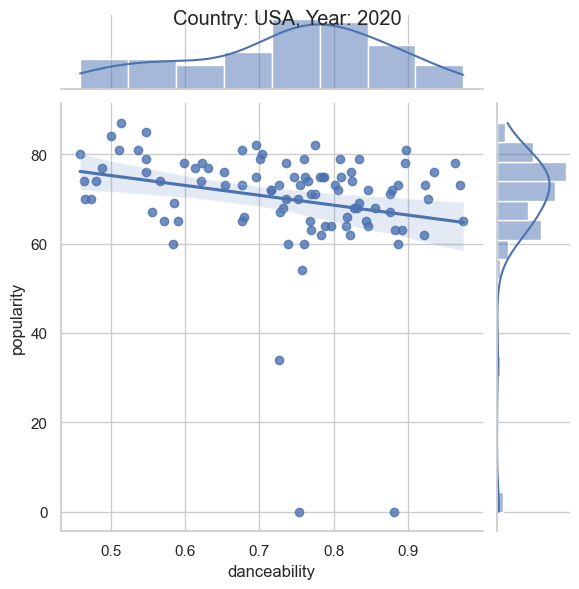

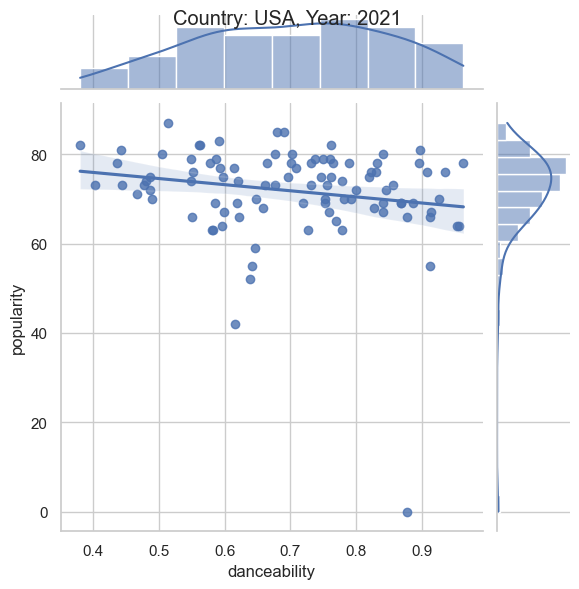

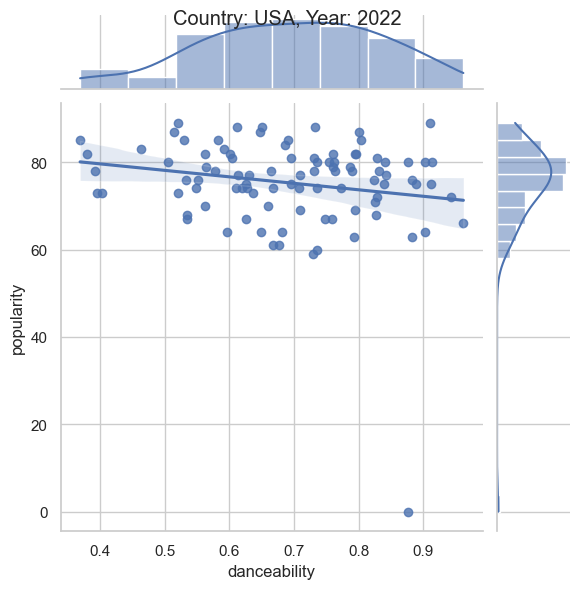

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the dataframe by country and year
grouped = df.groupby(['country', 'year'])

# Loop through each group and create a joint plot
for group_name, group_df in grouped:
    # Extract the group's data for the desired columns
    Correlation = group_df[['popularity', 'danceability', 'energy', 'valence', 'loudness', 'tempo']]
    # Create the joint plot for the group's data
    plot = sns.jointplot(data=Correlation, y='popularity', x='danceability', kind='reg')
    # Set the title of the plot to the group's name
    plot.fig.suptitle(f"Country: {group_name[0]}, Year: {group_name[1]}")
    # Save the plot to a file with a name based on the group's name
    filename = f"{group_name[0]}_{group_name[1]}.png"
    plt.savefig('charts/PopVSDance_' + filename)
    # Show the plot
    plt.show()


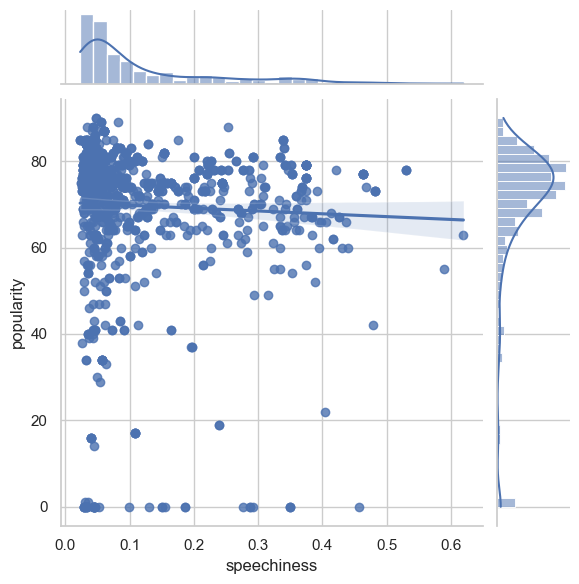

In [64]:
Correlation=df[['popularity', 'danceability','energy','speechiness','loudness','tempo']]
sns.jointplot(data=Correlation,y='popularity',x='speechiness',kind='reg')
plt.savefig('charts/popularity_speechiness.png')

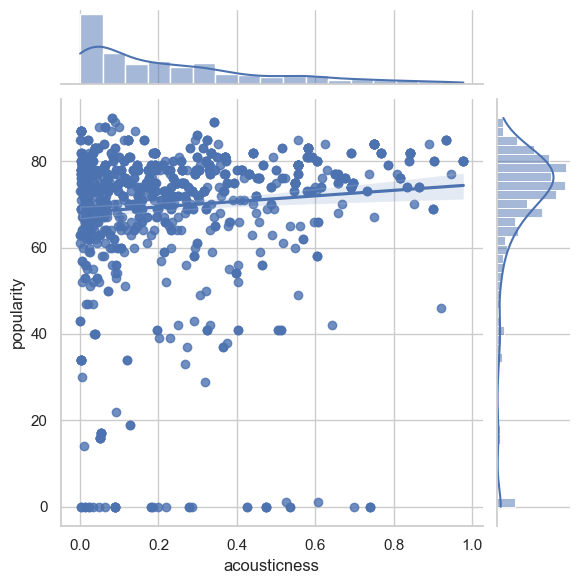

In [61]:
Correlation=df[['popularity', 'danceability','acousticness','speechiness','loudness','tempo']]
sns.jointplot(data=Correlation,y='popularity',x='acousticness',kind='reg')
plt.savefig('popularity_danceability.png')

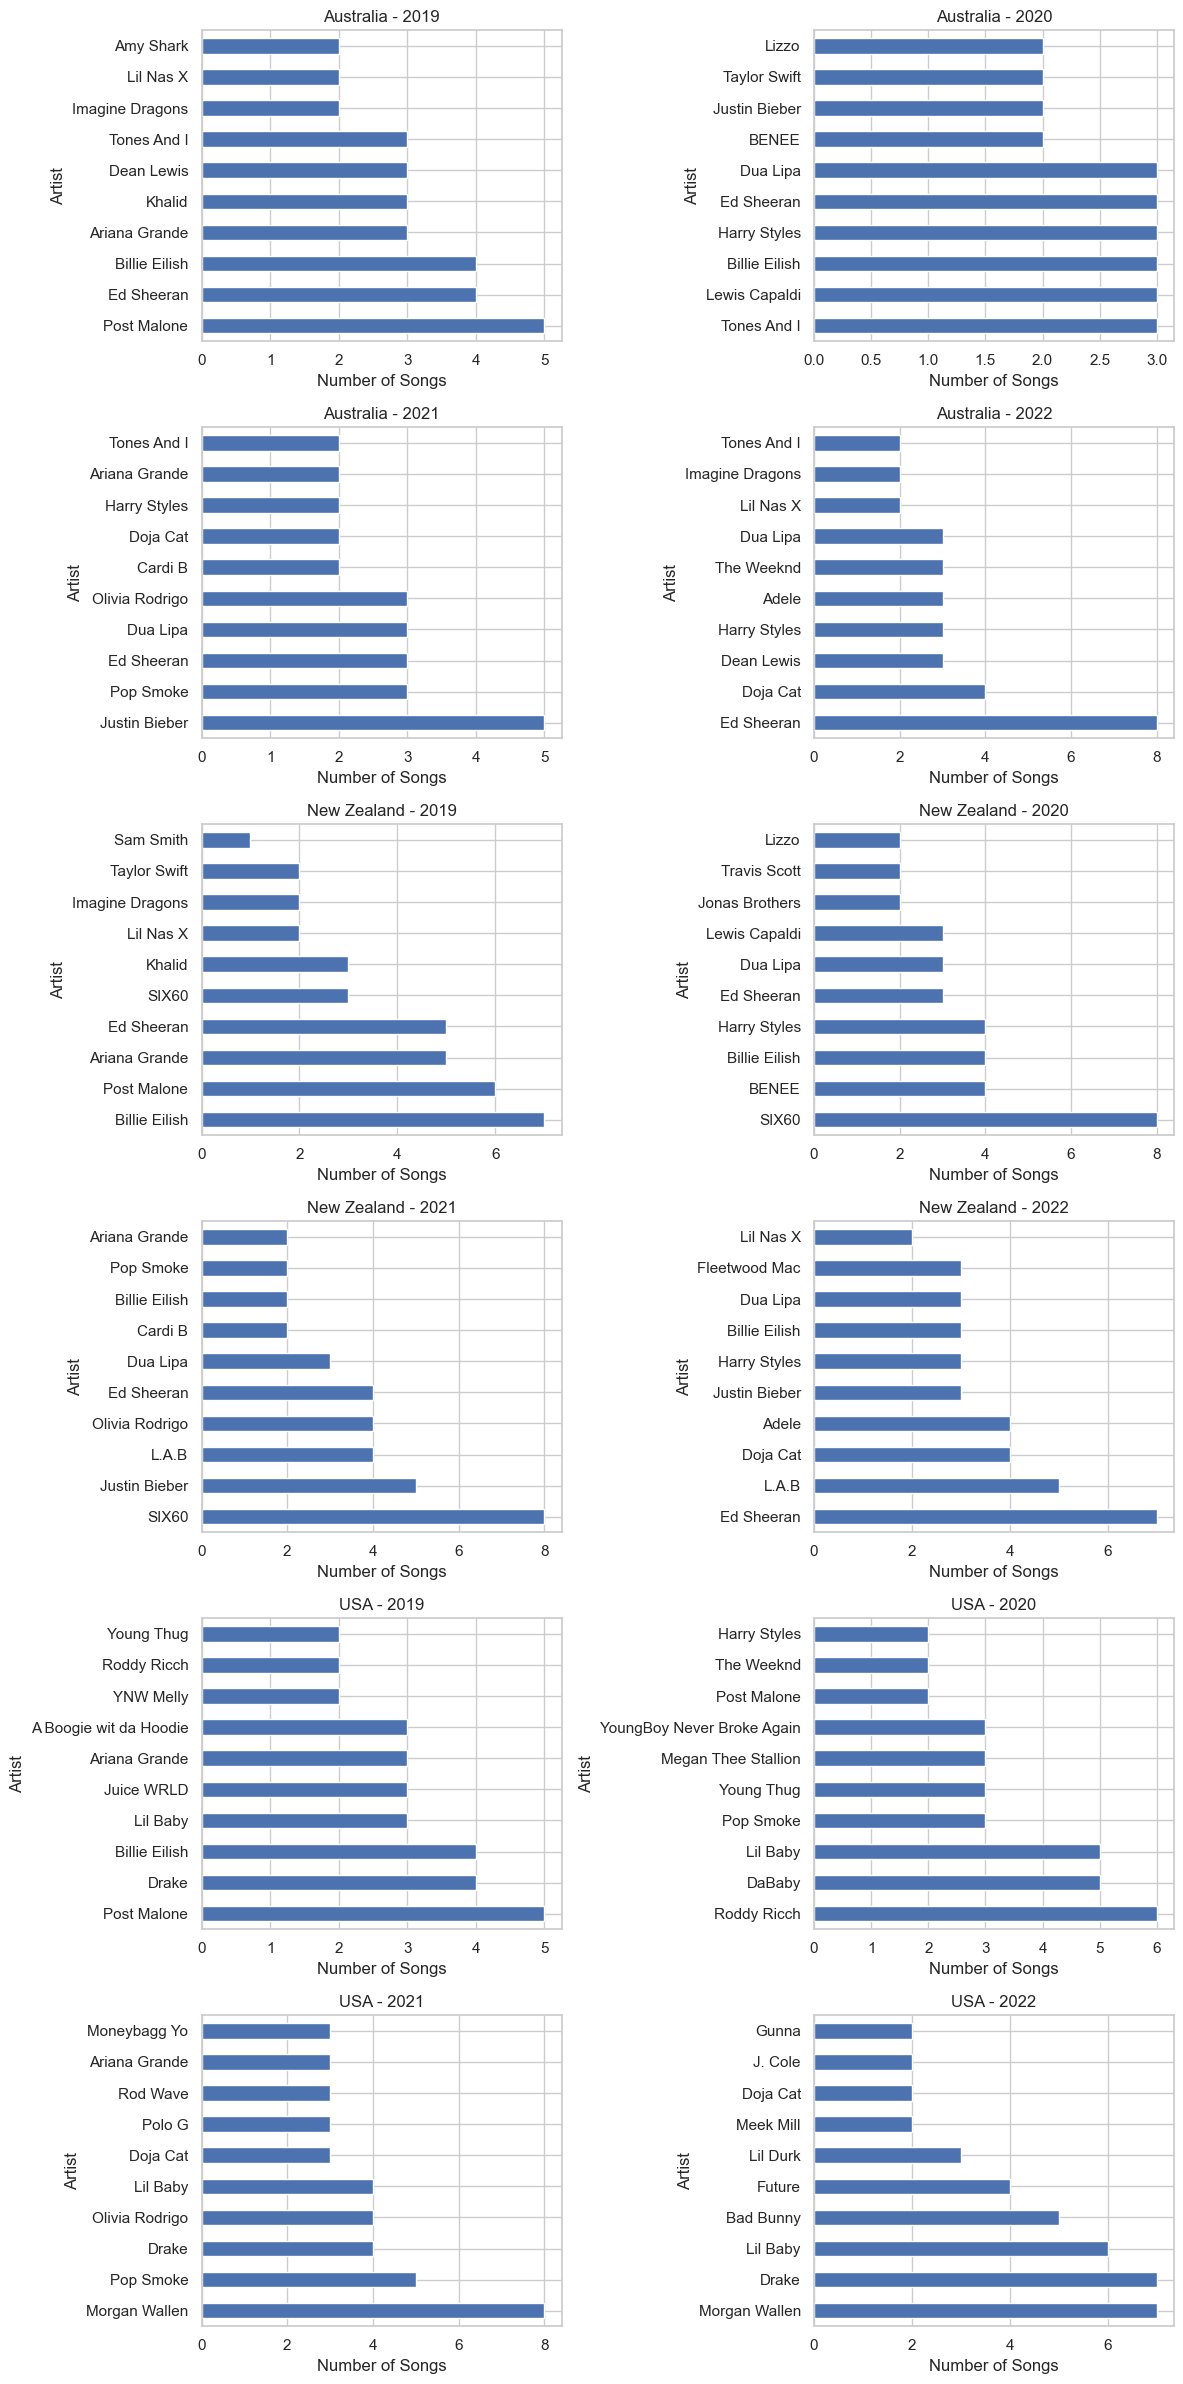

In [68]:
# Group the dataframe by country and year
groups = df.groupby(['country', 'year'])

# Define the number of top artists to show
num_top_artists = 10

# Create subplots for each country and year
num_groups = len(groups)
num_cols = 2
num_rows = (num_groups + 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Plot the top artists for each country and year
for i, ((country, year), group) in enumerate(groups):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.set_title(f'{country} - {year}')
    top_artists = group['artist'].value_counts().nlargest(num_top_artists)
    top_artists.plot(kind='barh', ax=ax, legend=None)
    ax.set_xlabel('Number of Songs')
    ax.set_ylabel('Artist')

# Adjust spacing and save the figure
plt.tight_layout()
plt.savefig('charts/top_artists_by_country_and_year.png')
plt.show()


In [69]:
from plotly.offline import init_notebook_mode, iplot, plot
key_mode = df.groupby(['key','mode']).size().unstack(fill_value=0).reset_index()
key_names = r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split()
key_mode.rename(columns={0:'minor',1:'major'}, inplace=True)
key_mode['key name'] = key_names

iplot(px.bar(key_mode, 
       x='key name', 
       y=['major', 'minor'],
       color_discrete_sequence=px.colors.qualitative.Pastel2,
       title='Major vs Minor per key'
      ))

plt.savefig('charts/mode_key.png')

<Figure size 640x480 with 0 Axes>

In [74]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_white',title='<b>Energy Versus Danceability')

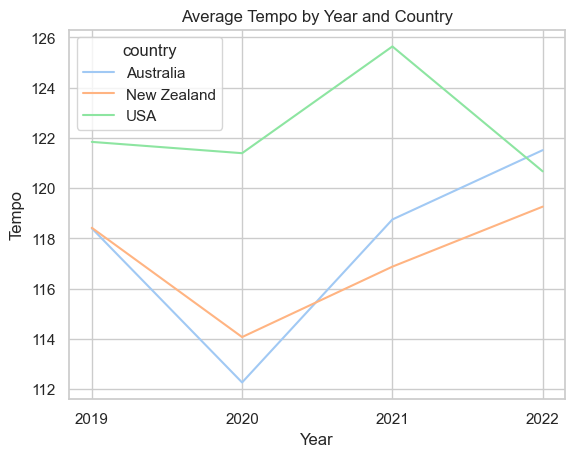

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group the dataframe by year and country, and calculate the average tempo for each group
df_grouped = df.groupby(['year', 'country'])['tempo'].mean().reset_index()

# Use Seaborn's lineplot function to plot a line chart of the average tempo for each country over the years
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(data=df_grouped, x='year', y='tempo', hue='country')


# Customize the plot
plt.title('Average Tempo by Year and Country')
plt.xlabel('Year')
plt.ylabel('Tempo')
plt.savefig('charts/tempo.png')
plt.show()


In [73]:
import plotly.graph_objects as go

fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_white',title_x=0.5)

plt.savefig('charts/feat_dists.png')
plt.show()

<Figure size 640x480 with 0 Axes>